In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('tianchi_mobile_recommend_train_user.csv')

In [3]:
user_data.head()
# 用户id，商品id，用户行为（1表示浏览，2表示收藏。3表示加入购物车，4表示支付），时间戳

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [5]:
# 此数据集数量过大，抽取部分数据  2014.11.1-2014.11.20月份数据
import datetime
start_time = datetime.datetime(2014,11,18)
end_time = datetime.datetime(2014,12,18)

user_data['time'] = pd.to_datetime(user_data['time'])
now_data = user_data[(user_data.time > start_time) & (user_data.time < end_time)]

In [6]:
now_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00
5,93784494,337869048,1,NaN,3979,2014-12-03 20:00:00


In [7]:
now_data.info()
# item_category值有空值，但我们不会分析到这个属性，所以我们不做空值处理

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11867590 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  int64         
 3   user_geohash   object        
 4   item_category  int64         
 5   time           datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 633.8+ MB


In [8]:
# 处理behavior_type 1表示浏览  2表示collect   3表示card  4表示pay
def f(x):
    if x == 1:
        x = 'pv'
    if x == 2:
        x = 'collect'
    if x == 3:
        x = 'card'
    if x == 4:
        x = 'pay'
    return x
now_data['behavior_type'] = now_data['behavior_type'].apply(f)
now_data['behavior_type'].head()

D:\ana\installl\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


0    pv
1    pv
3    pv
4    pv
5    pv
Name: behavior_type, dtype: object

In [9]:
now_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00


In [10]:
# time的日期和小时分成两列
# https://blog.csdn.net/qq_27575895/article/details/86768659
now_data['month'] = pd.to_datetime(now_data['time']).dt.normalize()
now_data['hour'] = pd.to_datetime(now_data['time']).dt.hour
now_data.head()

D:\ana\installl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ana\installl\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00,2014-12-16,21
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00,2014-12-03,20


In [11]:
# 构建模型

In [12]:
# APP访客总数 uv
# 页面总访问量 pv
# 人均页面访问量 pv/uv
# 跳失率=只点击一次浏览的用户数量/总的用户数量

In [13]:
from __future__ import division

In [14]:
# uv = pd.Series(now_data['user_id'].unique()).count()
uv = now_data['user_id'].unique().size
uv

9988

In [15]:
pv = now_data[now_data['behavior_type']=='pv']['behavior_type'].size
pv

11182815

In [16]:
pv/uv

1119.625050060072

In [17]:
def f1(group):
    return pd.Series(group.user_id.size)
    #return group[group['behavior_type'].size==1]
user_pv = now_data.groupby('user_id').apply(f1)
user_pv[user_pv==1].count()/uv

0    0.0004
dtype: float64

In [18]:
# 用户总行为数漏斗分析(转化率)
# 独立访客漏斗模型计算

In [19]:
pv = now_data[now_data['behavior_type']=='pv']['behavior_type'].size
collect = now_data[now_data['behavior_type']=='collect']['behavior_type'].size
card = now_data[now_data['behavior_type']=='card']['behavior_type'].size
pay = now_data[now_data['behavior_type']=='pay']['behavior_type'].size

uv_pv = now_data[now_data['behavior_type']=='pv']['user_id'].unique().size
uv_collect = now_data[now_data['behavior_type']=='collect']['user_id'].unique().size
uv_card = now_data[now_data['behavior_type']=='card']['user_id'].unique().size
uv_pay = now_data[now_data['behavior_type']=='pay']['user_id'].unique().size

In [20]:
(collect+card)/pv  #从浏览到收藏或者加入购物车的转化率仅5%左右  转化率较低

0.05081645363890935

In [21]:
pay/(collect+card)  #从收藏或加入购物车到购买的转化率为22%左右   我们应该着重把上一环节的转化率改善

0.20501486086743825

In [22]:
data = {'环节':['浏览','收藏或加入购物车','支付'],
       '人数':[pv,collect+card,pay],
       '单一转化率':[1.0,(collect+card)/pv,pay/(collect+card)],
       '总体转化率':[1.0,(collect+card)/pv,pay/pv],
       '独立访客数':[uv_pv,uv_collect+uv_card,uv_pay]}
c_rate = pd.DataFrame(data,columns=['环节','人数','单一转化率','总体转化率','独立访客数'])
c_rate

,环节,人数,单一转化率,总体转化率,独立访客数
0,浏览,11182815,1.000000,1.000000,9988
1,收藏或加入购物车,568271,0.050816,0.050816,15245
2,支付,116504,0.205015,0.010418,8844


In [23]:
# 不同时间尺度下用户行为分析
# 一个月内每天用户行为分析
# 一周内每天用户行为分析
# 一天内每个时间段用户行为分析

In [24]:
now_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11867590 entries, 0 to 12256905
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  object        
 3   user_geohash   object        
 4   item_category  int64         
 5   time           datetime64[ns]
 6   month          datetime64[ns]
 7   hour           int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 814.9+ MB


In [25]:
def f2(group):
    group['m_pv'] = group[group['behavior_type']=='pv'].size
    group['m_collect'] = group[group['behavior_type']=='collect'].size
    group['m_card'] = group[group['behavior_type']=='card'].size
    group['m_pay'] = group[group['behavior_type']=='pay'].size
    return group
grouped = now_data.groupby('month')
month_day = grouped.apply(f2)
#now_data.groupby(['month','betavior_type']).size().unstack() #可以使用这一句话进行处理

In [26]:
month_day.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour,m_pv,m_collect,m_card,m_pay
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00,2014-12-06,2,2937008,74907,108890,35992
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00,2014-12-09,20,2994088,76968,117630,37939
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10,2937008,74907,108890,35992
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00,2014-12-16,21,2987192,69741,101660,41481
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00,2014-12-03,20,3099976,76428,117320,42735


In [27]:
week_days = month_day
week_days.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour,m_pv,m_collect,m_card,m_pay
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00,2014-12-06,2,2937008,74907,108890,35992
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00,2014-12-09,20,2994088,76968,117630,37939
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10,2937008,74907,108890,35992
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00,2014-12-16,21,2987192,69741,101660,41481
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00,2014-12-03,20,3099976,76428,117320,42735


In [28]:
month_day = month_day[['month','m_pv','m_collect','m_card','m_pay']]

In [29]:
month_day_1 = month_day.pivot_table(index='month')
month_day_1

,m_card,m_collect,m_pay,m_pv
month,,,,
2014-11-18,98290,60327,39765,2662680
2014-11-19,101150,64368,40546,2702960
2014-11-20,100080,64503,38082,2662336
2014-11-21,86790,61488,33231,2516576
2014-11-22,99700,65268,39270,2724504
2014-11-23,104320,69318,36817,2889768
2014-11-24,103910,65997,37686,2857536
2014-11-25,98910,67428,38104,2795136
2014-11-26,93780,65916,39303,2724968


In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

# 支持中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

In [31]:
#import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

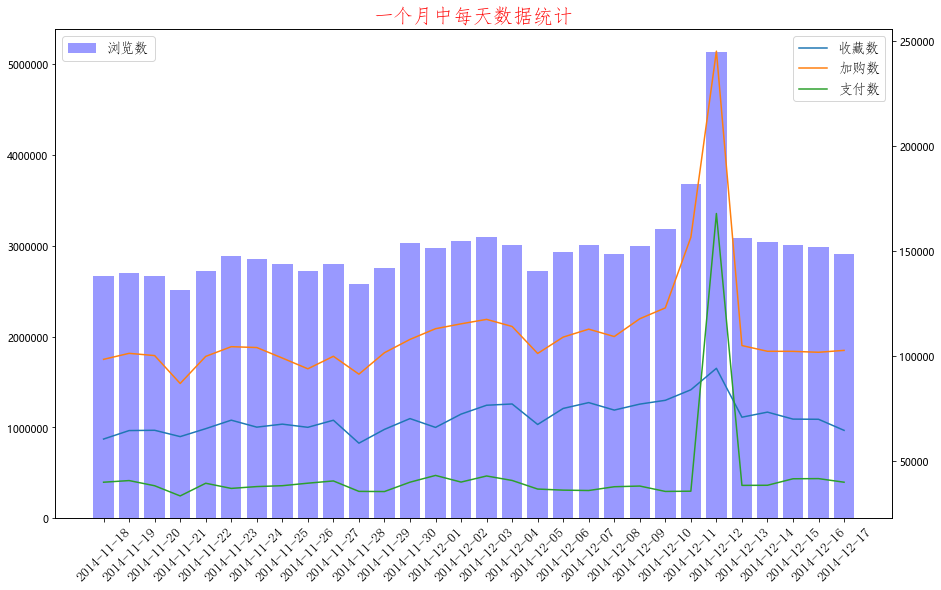

In [32]:
my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simfang.ttf',size=14)
x = month_day_1.index
y1 = month_day_1['m_pv']
y2 = month_day_1['m_collect']
y3 = month_day_1['m_card']
y4 = month_day_1['m_pay']
#plt.figure(figsize=(1500,900))
fig,ax1 = plt.subplots(figsize=(15, 9))

plt.title('一个月中每天数据统计',fontproperties=my_font,color='red',size=20)

x_ticks_label = [i.strftime('%Y-%m-%d') for i in x]
plt.xticks(range(len(x_ticks_label)),x_ticks_label,rotation = 45,fontproperties = my_font)

l1 = ax1.bar(range(len(x_ticks_label)),y1,facecolor='#9999ff',label='浏览数')
# 图例
ax1.legend(loc='upper left',prop=my_font)
#plt.xticks(rotation=45,fontproperties=my_font) #设置横坐标显示的角度，角度是逆时针

ax2 = ax1.twinx() #共享x轴  双纵轴
l2 = ax2.plot(range(len(x_ticks_label)),y2,label='收藏数')
l3 = ax2.plot(range(len(x_ticks_label)),y3,label='加购数')
l4 = ax2.plot(range(len(x_ticks_label)),y4,label='支付数')
# 图例
ax2.legend(loc='upper right',prop=my_font)
#plt.legend(handles=[l1,l2,l3,l4], loc=4)
plt.show()
# 可以看出双12当天各数据值都处于较高的水平，峰值

In [33]:
# 星期一是0，星期二是1
month_day_1['weekday'] = [i.weekday() for i in month_day_1.index]
month_day_1

,m_card,m_collect,m_pay,m_pv,weekday
month,,,,,
2014-11-18,98290,60327,39765,2662680,1
2014-11-19,101150,64368,40546,2702960,2
2014-11-20,100080,64503,38082,2662336,3
2014-11-21,86790,61488,33231,2516576,4
2014-11-22,99700,65268,39270,2724504,5
2014-11-23,104320,69318,36817,2889768,6
2014-11-24,103910,65997,37686,2857536,0
2014-11-25,98910,67428,38104,2795136,1
2014-11-26,93780,65916,39303,2724968,2


In [34]:
# 取出12.8-14号进行统计，正好一周
week_day = month_day_1.iloc[-10:-3]
week_day

,m_card,m_collect,m_pay,m_pv,weekday
month,,,,,
2014-12-08,109150,74124,37609,2912776,0
2014-12-09,117630,76968,37939,2994088,1
2014-12-10,122800,78777,35376,3181288,2
2014-12-11,156430,83790,35486,3682632,3
2014-12-12,245080,94014,167761,5132056,4
2014-12-13,104860,70731,38258,3082696,5
2014-12-14,102130,73152,38313,3045736,6


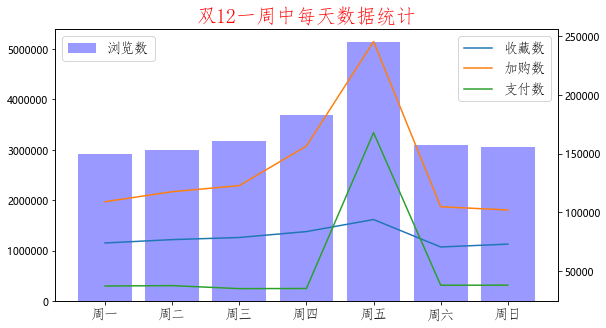

In [35]:
my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simfang.ttf',size=14)
x = week_day['weekday']
y1 = week_day['m_pv']
y2 = week_day['m_collect']
y3 = week_day['m_card']
y4 = week_day['m_pay']
#plt.figure(figsize=(1500,900))
fig,ax1 = plt.subplots(figsize=(9, 5))

plt.title('双12一周中每天数据统计',fontproperties=my_font,color='red',size=20)

x_ticks_label = ['周一','周二','周三','周四','周五','周六','周日']
plt.xticks(range(len(x_ticks_label)),x_ticks_label,rotation = 0,fontproperties = my_font)

l1 = ax1.bar(range(len(x_ticks_label)),y1,facecolor='#9999ff',label='浏览数')
# 图例
ax1.legend(loc='upper left',prop=my_font)
#plt.xticks(rotation=45,fontproperties=my_font) #设置横坐标显示的角度，角度是逆时针

ax2 = ax1.twinx() #共享x轴  双纵轴
l2 = ax2.plot(range(len(x_ticks_label)),y2,label='收藏数')
l3 = ax2.plot(range(len(x_ticks_label)),y3,label='加购数')
l4 = ax2.plot(range(len(x_ticks_label)),y4,label='支付数')
# 图例
ax2.legend(loc='upper right',prop=my_font)
#plt.legend(handles=[l1,l2,l3,l4], loc=4)
plt.show()

In [36]:
week_day_1 = month_day_1.iloc[6:13]
week_day_1

,m_card,m_collect,m_pay,m_pv,weekday
month,,,,,
2014-11-24,103910,65997,37686,2857536,0
2014-11-25,98910,67428,38104,2795136,1
2014-11-26,93780,65916,39303,2724968,2
2014-11-27,99750,69291,40370,2800320,3
2014-11-28,91230,58356,35398,2574504,4
2014-11-29,101450,64926,35321,2753016,5
2014-11-30,107790,70074,39776,3035512,6


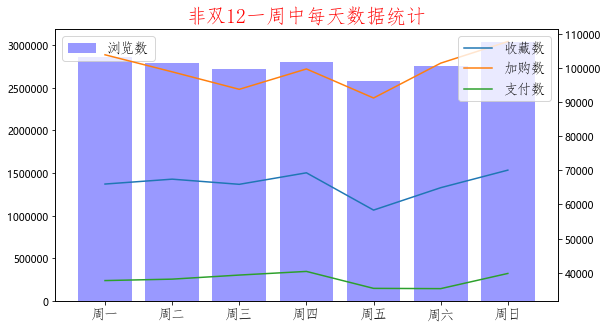

In [37]:
my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simfang.ttf',size=14)
x = week_day_1['weekday']
y1 = week_day_1['m_pv']
y2 = week_day_1['m_collect']
y3 = week_day_1['m_card']
y4 = week_day_1['m_pay']
#plt.figure(figsize=(1500,900))
fig,ax1 = plt.subplots(figsize=(9, 5))

plt.title('非双12一周中每天数据统计',fontproperties=my_font,color='red',size=20)

x_ticks_label = ['周一','周二','周三','周四','周五','周六','周日']
plt.xticks(range(len(x_ticks_label)),x_ticks_label,rotation = 0,fontproperties = my_font)

l1 = ax1.bar(range(len(x_ticks_label)),y1,facecolor='#9999ff',label='浏览数')
# 图例
ax1.legend(loc='upper left',prop=my_font)
#plt.xticks(rotation=45,fontproperties=my_font) #设置横坐标显示的角度，角度是逆时针

ax2 = ax1.twinx() #共享x轴  双纵轴
l2 = ax2.plot(range(len(x_ticks_label)),y2,label='收藏数')
l3 = ax2.plot(range(len(x_ticks_label)),y3,label='加购数')
l4 = ax2.plot(range(len(x_ticks_label)),y4,label='支付数')
# 图例
ax2.legend(loc='upper right',prop=my_font)
#plt.legend(handles=[l1,l2,l3,l4], loc=4)
plt.show()
# 周五各项数据处于最低值，周六日一逐渐升高，所以一周中周末的购买力处于较高水平

In [38]:
# 选取11-30日的24个小时进行数据统计
day = week_days[week_days['month'] == '2014-11-30']
day

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour,m_pv,m_collect,m_card,m_pay
375,103802946,214907702,pv,NaN,6516,2014-11-30 23:00:00,2014-11-30,23,3035512,70074,107790,39776
455,106557109,163219980,pv,NaN,1838,2014-11-30 19:00:00,2014-11-30,19,3035512,70074,107790,39776
473,106557109,163219980,card,NaN,1838,2014-11-30 19:00:00,2014-11-30,19,3035512,70074,107790,39776
532,100509623,179655463,pv,NaN,12862,2014-11-30 10:00:00,2014-11-30,10,3035512,70074,107790,39776
569,110253038,159572340,pv,NaN,6228,2014-11-30 07:00:00,2014-11-30,7,3035512,70074,107790,39776
...,...,...,...,...,...,...,...,...,...,...,...,...
12256841,81933823,22635532,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,3035512,70074,107790,39776
12256842,81933823,282387795,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,3035512,70074,107790,39776
12256843,81933823,71191663,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,3035512,70074,107790,39776
12256870,91530370,254385676,pv,NaN,2122,2014-11-30 08:00:00,2014-11-30,8,3035512,70074,107790,39776


In [39]:
def f3(group):
    group['m_pv'] = group[group['behavior_type']=='pv'].size
    group['m_collect'] = group[group['behavior_type']=='collect'].size
    group['m_card'] = group[group['behavior_type']=='card'].size
    group['m_pay'] = group[group['behavior_type']=='pay'].size
    return group
    
day_1 = day.groupby('hour').apply(f3)
day_1

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour,m_pv,m_collect,m_card,m_pay
375,103802946,214907702,pv,NaN,6516,2014-11-30 23:00:00,2014-11-30,23,316440,8976,10380,2364
455,106557109,163219980,pv,NaN,1838,2014-11-30 19:00:00,2014-11-30,19,268536,5004,6720,2664
473,106557109,163219980,card,NaN,1838,2014-11-30 19:00:00,2014-11-30,19,268536,5004,6720,2664
532,100509623,179655463,pv,NaN,12862,2014-11-30 10:00:00,2014-11-30,10,187836,3660,4548,2772
569,110253038,159572340,pv,NaN,6228,2014-11-30 07:00:00,2014-11-30,7,110304,2340,2280,300
...,...,...,...,...,...,...,...,...,...,...,...,...
12256841,81933823,22635532,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,421872,8196,12324,3828
12256842,81933823,282387795,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,421872,8196,12324,3828
12256843,81933823,71191663,pv,NaN,5468,2014-11-30 21:00:00,2014-11-30,21,421872,8196,12324,3828
12256870,91530370,254385676,pv,NaN,2122,2014-11-30 08:00:00,2014-11-30,8,160452,3492,4188,828


In [40]:
day_1 = day_1[['hour','m_pv','m_collect','m_card','m_pay']]
day_1

,hour,m_pv,m_collect,m_card,m_pay
375,23,316440,8976,10380,2364
455,19,268536,5004,6720,2664
473,19,268536,5004,6720,2664
532,10,187836,3660,4548,2772
569,7,110304,2340,2280,300
...,...,...,...,...,...
12256841,21,421872,8196,12324,3828
12256842,21,421872,8196,12324,3828
12256843,21,421872,8196,12324,3828
12256870,8,160452,3492,4188,828


In [41]:
day_1 = day_1.pivot_table(index='hour')
day_1

,m_card,m_collect,m_pay,m_pv
hour,,,,
0,4500,4224,984,185856
1,3240,2568,516,105816
2,1584,1308,168,61356
3,1200,1032,252,41496
4,540,444,240,23448
5,576,468,84,19272
6,1140,936,396,46032
7,2280,2340,300,110304
8,4188,3492,828,160452


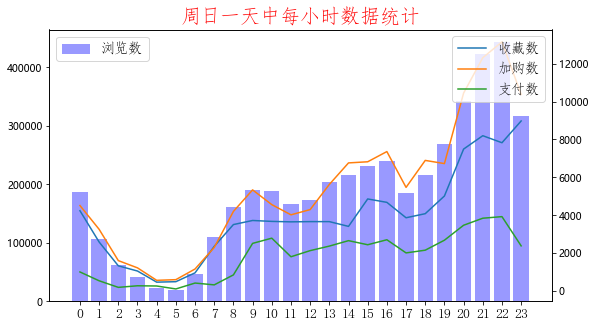

In [42]:
my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simfang.ttf',size=14)
x = day_1.index
y1 = day_1['m_pv']
y2 = day_1['m_collect']
y3 = day_1['m_card']
y4 = day_1['m_pay']
#plt.figure(figsize=(1500,900))
fig,ax1 = plt.subplots(figsize=(9, 5))

plt.title('周日一天中每小时数据统计',fontproperties=my_font,color='red',size=20)

x_ticks_label = [i for i in x]
plt.xticks(range(len(x_ticks_label)),x_ticks_label,rotation = 0,fontproperties = my_font)

l1 = ax1.bar(range(len(x_ticks_label)),y1,facecolor='#9999ff',label='浏览数')
# 图例
ax1.legend(loc='upper left',prop=my_font)
#plt.xticks(rotation=45,fontproperties=my_font) #设置横坐标显示的角度，角度是逆时针

ax2 = ax1.twinx() #共享x轴  双纵轴
l2 = ax2.plot(range(len(x_ticks_label)),y2,label='收藏数')
l3 = ax2.plot(range(len(x_ticks_label)),y3,label='加购数')
l4 = ax2.plot(range(len(x_ticks_label)),y4,label='支付数')
# 图例
ax2.legend(loc='upper right',prop=my_font)
#plt.legend(handles=[l1,l2,l3,l4], loc=4)
plt.show()
# 一天中有三个高峰，8-10点  13-16点   20-22点（重点投放）

In [44]:
# 双12不同商品种类的用户行为
# 所有商品的购买次数
# 找出购买次数，收藏次数，加购次数，支付次数排名前10名的商品，比较这些指标

In [45]:
now_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00,2014-12-16,21
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00,2014-12-03,20


In [46]:
# 取出双12当天的数据
now_data_12 = now_data[now_data['month']=='2014-12-12']
now_data_12

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour
13,101260672,212072908,pv,95q0is4,10984,2014-12-12 11:00:00,2014-12-12,11
20,101781721,19349307,pv,9rgt16g,1863,2014-12-12 12:00:00,2014-12-12,12
54,100684618,94486594,pv,NaN,10984,2014-12-12 23:00:00,2014-12-12,23
69,103802946,190848347,pv,NaN,5232,2014-12-12 22:00:00,2014-12-12,22
95,104811265,354843735,pv,NaN,10585,2014-12-12 21:00:00,2014-12-12,21
...,...,...,...,...,...,...,...,...
12256729,79359253,69183918,pv,NaN,1863,2014-12-12 19:00:00,2014-12-12,19
12256874,91530370,181004546,pv,NaN,12758,2014-12-12 23:00:00,2014-12-12,23
12256878,91530370,170765640,pv,NaN,3381,2014-12-12 00:00:00,2014-12-12,0
12256896,91530370,94732789,pv,NaN,12090,2014-12-12 23:00:00,2014-12-12,23


In [47]:
item_aly = now_data_12[['item_id','behavior_type']]
item_aly.head()

,item_id,behavior_type
13,212072908,pv
20,19349307,pv
54,94486594,pv
69,190848347,pv
95,354843735,pv


In [48]:
item_aly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691712 entries, 13 to 12256900
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_id        691712 non-null  int64 
 1   behavior_type  691712 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.8+ MB


In [49]:
item_aly_1 = item_aly.groupby(['item_id','behavior_type']).size().unstack().fillna(0)
item_aly_1.head()

behavior_type,card,collect,pay,pv
item_id,,,,
668,0.0,0.0,0.0,3.0
2249,1.0,0.0,0.0,2.0
2966,0.0,0.0,0.0,3.0
4273,1.0,0.0,2.0,6.0
5008,0.0,0.0,0.0,1.0


In [50]:
pay_nums = item_aly_1['pay'].value_counts().drop(0)
pay_nums
# 没有出现购买用户数量非常集中的商品，购买一次的商品占到89.3%，说明商品售卖主要依靠长尾商品的累积效应，而非爆款商品的带动

1.0     11724
2.0      1012
3.0       242
4.0        86
5.0        29
6.0        17
8.0         5
10.0        5
7.0         3
15.0        2
9.0         2
11.0        1
16.0        1
Name: pay, dtype: int64

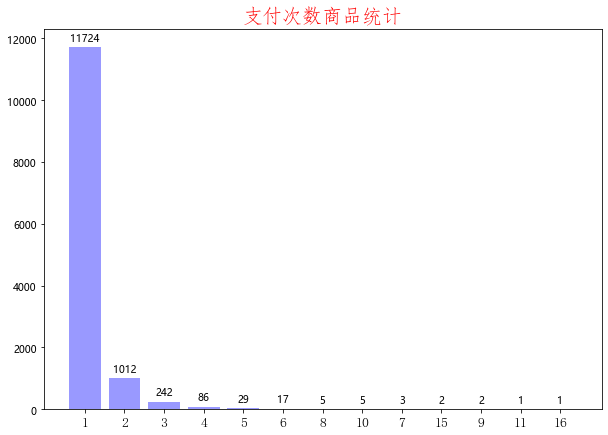

In [73]:
my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simfang.ttf',size=14)
x = pay_nums.index
y = pay_nums.values
#plt.figure(figsize=(1500,900))
fig,ax1 = plt.subplots(figsize=(10, 7))

plt.title('支付次数商品统计',fontproperties=my_font,color='red',size=20)

x_ticks_label = x.map(lambda a: int(a))
plt.xticks(range(len(x_ticks_label)),x_ticks_label,rotation = 0,fontproperties = my_font)

l1 = ax1.bar(range(len(x_ticks_label)),y,facecolor='#9999ff')

# 给条形图添加数据标注
for x, y in enumerate(pay_nums.values):
    plt.text(x,y+200, "%s" %y,ha='center')
    
plt.show()

In [75]:
# 商品购买次数排名
item_aly_1['pay'].sort_values(ascending=False)[:60]

item_id
72183675     16.0
113153774    15.0
216776169    15.0
83098075     11.0
115052027    10.0
87546522     10.0
70089149     10.0
264836800    10.0
68763042     10.0
254324250     9.0
185974437     9.0
325913635     8.0
169352229     8.0
103172325     8.0
359620248     8.0
218555804     8.0
403789093     7.0
303205878     7.0
234892007     7.0
352578817     6.0
136731426     6.0
122165458     6.0
243811562     6.0
342617583     6.0
28106123      6.0
330592894     6.0
276636269     6.0
340693758     6.0
106434283     6.0
60065681      6.0
3116906       6.0
348536111     6.0
28670273      6.0
311287035     6.0
332303278     6.0
93362959      6.0
208397827     5.0
341889939     5.0
14087919      5.0
252828873     5.0
181258796     5.0
223894129     5.0
81186541      5.0
325175700     5.0
143741074     5.0
226219907     5.0
140470962     5.0
227532037     5.0
308062133     5.0
355109501     5.0
42330478      5.0
176556528     5.0
259238896     5.0
382513156     5.0
281073717     5.0
31

In [53]:
# 购买次数最多的商品
item_aly_1['pay'].idxmax()

72183675

In [54]:
# 商品浏览次数排名
item_aly_1['pv'].sort_values(ascending=False)[:20]

item_id
32585501     330.0
112921337    206.0
382418692    170.0
284918203    168.0
246551223    151.0
61629489     150.0
216674300    150.0
209323160    147.0
2217535      144.0
355491322    140.0
239548243    137.0
115052027    136.0
217213194    133.0
47461712     133.0
331075175    128.0
27364659     126.0
223667336    124.0
6703599      123.0
276636269    122.0
377464983    109.0
Name: pv, dtype: float64

In [55]:
# 商品收藏次数排名
item_aly_1['collect'].sort_values(ascending=False)[:20]

item_id
32585501     8.0
223667336    8.0
200431945    6.0
284918203    5.0
216674300    4.0
327974438    4.0
47461712     4.0
276636269    3.0
193555043    3.0
108815240    3.0
75483942     3.0
331075175    3.0
7161679      3.0
102544056    3.0
239225633    3.0
179349755    3.0
227895278    3.0
172447670    3.0
66875804     3.0
139902802    3.0
Name: collect, dtype: float64

In [56]:
# 商品加购次数排名
item_aly_1['card'].sort_values(ascending=False)[:20]

item_id
72183675     13.0
83098075     13.0
216776169    10.0
340693758     8.0
43532866      8.0
309731001     7.0
331075175     7.0
115052027     7.0
103172325     7.0
33254436      6.0
185241680     6.0
341889939     6.0
240662187     6.0
87546522      6.0
241918196     6.0
252054863     6.0
295991501     5.0
276636269     5.0
193003777     5.0
114910875     5.0
Name: card, dtype: float64

In [86]:
# 浏览次数最高的商品，支付次数没有占据前20，所以意味着浏览之后没有很好的转化为实际销量
# 加购高的商品，支付次数也较高，购物车和销量相关

In [57]:
# RFM模型找出有价值的用户，对用户群进行划分
# R 最近购买的时间
# F 购买的频次
# M 支付金额

In [58]:
now_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour
0,98047837,232431562,pv,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,pv,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
3,98662432,320593836,pv,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,pv,NaN,13926,2014-12-16 21:00:00,2014-12-16,21
5,93784494,337869048,pv,NaN,3979,2014-12-03 20:00:00,2014-12-03,20


In [59]:
# 取出所有购买的商品
pay_pros = now_data[now_data['behavior_type']=='pay']
pay_pros

,user_id,item_id,behavior_type,user_geohash,item_category,time,month,hour
148,101260672,73008997,pay,NaN,4076,2014-11-25 13:00:00,2014-11-25,13
152,116730636,85319721,pay,NaN,10079,2014-12-17 11:00:00,2014-12-17,11
158,104811265,61764614,pay,NaN,675,2014-12-01 13:00:00,2014-12-01,13
185,106230218,238910858,pay,NaN,12090,2014-12-03 11:00:00,2014-12-03,11
207,100684618,271840783,pay,NaN,12220,2014-11-23 18:00:00,2014-11-23,18
...,...,...,...,...,...,...,...,...
12256125,60734132,367496336,pay,991j536,1863,2014-12-15 20:00:00,2014-12-15,20
12256257,62781637,360496886,pay,NaN,3988,2014-12-17 10:00:00,2014-12-17,10
12256278,62781637,162730101,pay,NaN,7549,2014-12-11 12:00:00,2014-12-11,12
12256310,62781637,176396353,pay,NaN,2347,2014-11-28 08:00:00,2014-11-28,8


In [60]:
pay_pros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116504 entries, 148 to 12256651
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        116504 non-null  int64         
 1   item_id        116504 non-null  int64         
 2   behavior_type  116504 non-null  object        
 3   user_geohash   37181 non-null   object        
 4   item_category  116504 non-null  int64         
 5   time           116504 non-null  datetime64[ns]
 6   month          116504 non-null  datetime64[ns]
 7   hour           116504 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 8.0+ MB


In [61]:
# R 购买时间在11.17-23号 为0   11.24-30 为1   12.1-12.5 为2  12.6-11 为3  12.12-17为4

In [62]:
user_rfm = pay_pros.groupby('user_id')['time'].max() # 每个用户最近的购买时间
user_rfm

user_id
4913        2014-12-16 12:00:00
6118        2014-12-17 21:00:00
7528        2014-12-13 19:00:00
7591        2014-12-13 09:00:00
12645       2014-12-14 19:00:00
                    ...        
142376113   2014-12-08 16:00:00
142412247   2014-12-15 10:00:00
142430177   2014-12-14 23:00:00
142450275   2014-12-13 12:00:00
142455899   2014-12-04 13:00:00
Name: time, Length: 8844, dtype: datetime64[ns]

In [63]:
user_rfm1 = pd.DataFrame(user_rfm)
user_rfm1

,time
user_id,
4913,2014-12-16 12:00:00
6118,2014-12-17 21:00:00
7528,2014-12-13 19:00:00
7591,2014-12-13 09:00:00
12645,2014-12-14 19:00:00
...,...
142376113,2014-12-08 16:00:00
142412247,2014-12-15 10:00:00
142430177,2014-12-14 23:00:00


In [64]:
time0 = datetime.datetime(2014,11,17)
time1 = datetime.datetime(2014,11,23)
time2 = datetime.datetime(2014,11,24)
time3 = datetime.datetime(2014,11,30)
time4 = datetime.datetime(2014,12,1)
time5 = datetime.datetime(2014,12,5)
time6 = datetime.datetime(2014,12,6)
time7 = datetime.datetime(2014,12,11)
time8 = datetime.datetime(2014,12,12)
time9 = datetime.datetime(2014,12,18)

def f4(x):
    if x>=time0 and x<time1:
        return 0
    elif x>=time1 and x<time3:
        return 1
    elif x>=time3 and x<time5:
        return 2
    elif x>=time5 and x<time7:
        return 3
    elif x>=time7 and x<time9:
        return 4
user_rfm1['R'] = user_rfm1['time'].apply(f4)

In [65]:
user_rfm1

,time,R
user_id,,
4913,2014-12-16 12:00:00,4
6118,2014-12-17 21:00:00,4
7528,2014-12-13 19:00:00,4
7591,2014-12-13 09:00:00,4
12645,2014-12-14 19:00:00,4
...,...,...
142376113,2014-12-08 16:00:00,3
142412247,2014-12-15 10:00:00,4
142430177,2014-12-14 23:00:00,4


In [66]:
# 付费用户中用户的消费频次
pay_users = pay_pros.groupby('user_id')['behavior_type'].size()
pay_users.sort_values(ascending=False)

user_id
122338823    791
123842164    617
51492142     410
56560718     251
35306096     242
            ... 
123679342      1
123631012      1
39248540       1
76896505       1
37817890       1
Name: behavior_type, Length: 8844, dtype: int64

In [67]:
# 用户消费频次为1-791    1-157为0   158-316为1   317-474为2   475-633为3   634-791为4

In [68]:
def f5(x):
    if x>=1 and x<=157:
        return 0
    if x>=158 and x<=316:
        return 1
    if x>=317 and x<=474:
        return 2
    if x>=475 and x<=633:
        return 3
    if x>=634 and x<=791:
        return 4
user_rfm1['F'] = pay_users.apply(f5)

In [69]:
user_rfm1

,time,R,F
user_id,,,
4913,2014-12-16 12:00:00,4,0
6118,2014-12-17 21:00:00,4,0
7528,2014-12-13 19:00:00,4,0
7591,2014-12-13 09:00:00,4,0
12645,2014-12-14 19:00:00,4,0
...,...,...,...
142376113,2014-12-08 16:00:00,3,0
142412247,2014-12-15 10:00:00,4,0
142430177,2014-12-14 23:00:00,4,0


In [70]:
user_rfm1.sort_values(by=['R','F'],ascending=False)

,time,R,F
user_id,,,
122338823,2014-12-16 21:00:00,4,4
123842164,2014-12-17 20:00:00,4,3
51492142,2014-12-17 17:00:00,4,2
14515063,2014-12-17 20:00:00,4,1
33448326,2014-12-17 14:00:00,4,1
...,...,...,...
141439882,2014-11-20 19:00:00,0,0
141609995,2014-11-19 12:00:00,0,0
141792132,2014-11-18 14:00:00,0,0


In [213]:
# 用R  F的平均值来衡量  高于还是低于  区分出客户类型
user_rfm1['R'].mean()

3.495364088647671

In [214]:
user_rfm1['F'].mean()

0.001582994120307553

In [232]:
def f6(a,b):
    if a>3 and b>1:
        return '重要价值'
    if a>3 and b<=1:
        return '重要保持'
    if a<=3 and b>1:
        return '重要发展'
    if a<=3 and b<1:
        return '一般价值'
user_rfm1['consume_type'] = user_rfm1.apply(lambda row: f6(row['R'],row['F']),axis=1)

In [233]:
user_rfm1.sort_values(by=['R','F'],ascending=False)
#对于重要价值用户，他们是最优质的用户，需要重点关注并保持， 应该提高满意度，增加留存；
#对于重要保持用户，他们最近有购买，但购买频率不高，可以通过活动等提高其购买频率；
#对于重要发展用户，他们虽然最近没有购买，但以往购买频率高，可以做触达，以防止流失；
#对于一般价值用户，他们最近没有购买，以往购买频率也不高，特别容易流失，所以应该赠送优惠券或推送活动信息，唤醒购买意愿。

,time,R,F,consume_type
user_id,,,,
122338823,2014-12-16 21:00:00,4,4,重要价值
123842164,2014-12-17 20:00:00,4,3,重要价值
51492142,2014-12-17 17:00:00,4,2,重要价值
14515063,2014-12-17 20:00:00,4,1,重要保持
33448326,2014-12-17 14:00:00,4,1,重要保持
...,...,...,...,...
141439882,2014-11-20 19:00:00,0,0,一般价值
141609995,2014-11-19 12:00:00,0,0,一般价值
141792132,2014-11-18 14:00:00,0,0,一般价值


# 结束

In [31]:
import numpy as np
# from pyecharts import Funnel

In [32]:
#attrs = data['环节']
#attr_value = (np.array(data['总体转化率'])* 100)
#funnel1 = Funnel("总体转化漏斗图一",width=800, height=400, title_pos='center')
#funnel1.add(name="商品交易行环节",       # 指定图例名称            
#            attr=attrs,                # 指定属性名称            
#            value = attr_value,        # 指定属性所对应的值            
#            is_label_show=True,        # 指定标签是否显示            
#            label_formatter='{c}%',    # 指定标签显示的格式           
#            label_pos="inside",        # 指定标签的位置           
#            legend_orient='vertical',  # 指定图例的方向            
#            legend_pos='left',         # 指定图例的位置            
#            is_legend_show=True)       # 指定图例是否显示 funnel1.render()funnel1